In [1]:
import flappy_bird_gymnasium
import gymnasium
import os
import pandas as pd
import matplotlib.pyplot as plt
from agents.QBird import QBird

In [2]:
FILE = "data/q_table.npy"
env = gymnasium.make("FlappyBird-v0")
agent = QBird(
    prob=0.5,
    epsilon=0.1,
    alpha=0.1,
    gamma=1,
    epsilonDecay=True,
    yDiffPrecision=50,
    yVelPrecision=20,
    xPosPrecision=20
)
iters_between_evals = 10000

In [3]:
if os.path.isfile(FILE):
    agent.load(FILE)

In [4]:
reward_info = agent.train(env, 100000, iters_between_evals, 100)
env.close()

Average reward: 6.734514062499986
Max reward: 14.239062499999964
5.0%
10.0%
Average reward: 3.2643242187499855
Max reward: 14.114453124999965
15.0%
20.0%
Average reward: 5.291773437499987
Max reward: 25.724218750000095
25.0%
30.0%
Average reward: 17.306730468750057
Max reward: 65.3613281250004
35.0%
40.0%
Average reward: 17.223046875000033
Max reward: 74.70117187499986
45.0%
50.0%
Average reward: 17.02383593750004
Max reward: 55.12304687500054
55.0%
60.0%
Average reward: 20.602242187500064
Max reward: 70.28320312500016
65.0%
70.0%
Average reward: 19.542761718750047
Max reward: 91.06640624999923
75.0%
80.0%
Average reward: 16.89298437500004
Max reward: 58.080078125000476
85.0%
90.0%
Average reward: 18.59171875000005
Max reward: 55.63281250000047
95.0%
100.0%


In [5]:
agent.save(FILE)

In [6]:
env = gymnasium.make("FlappyBird-v0", render_mode="human")
agent.play(env)
env.close()

Total reward: 13.441796874999964


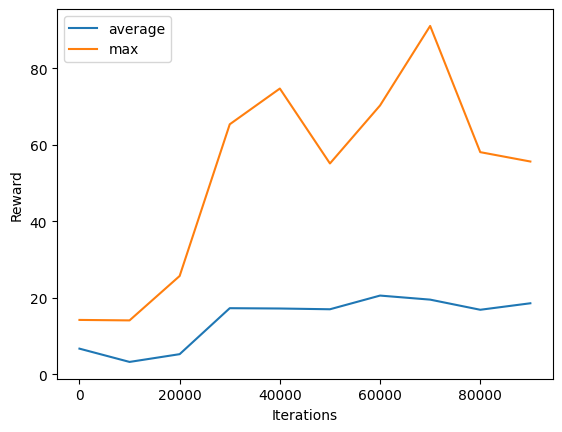

In [7]:
# Plotting
df = pd.DataFrame(reward_info)
df.columns = ["average", "max"]
df.index = df.index * iters_between_evals
# Plot with axes labels
df.plot()
plt.xlabel("Iterations")
plt.ylabel("Reward")
plt.show()